<a href="https://colab.research.google.com/github/artemmiyy/psu_quants/blob/main/MonteCarloSimulation(03_23_2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance 
import math
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas_datareader import data as pdr 
import yfinance as yf 
yf.pdr_override()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
stock = pdr.get_data_yahoo("TROX" , start = "2018-1-1", end = "2023-2-20")

stock.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.559999,21.049999,20.320000,20.940001,18.648155,1802500
2018-01-03,21.000000,21.490000,20.879999,21.219999,18.897509,1258300
2018-01-04,21.299999,21.430000,20.910000,21.260000,18.933132,1187400
2018-01-05,21.340000,21.400000,20.830000,21.030001,18.728306,904000
2018-01-08,21.090000,21.340000,20.750000,20.850000,18.568008,635700


In [ ]:
time_elapsed = (stock.index[-1] - stock.index[0]).days 
total_growth = (stock['Adj Close'][-1] / stock['Adj Close'][1])
total_growth

number_of_years = time_elapsed / 365.0 

cagr = total_growth ** (1/number_of_years) - 1 

std_dev = stock['Adj Close'].pct_change().std()

std_dev = std_dev * math.sqrt(250)

print(cagr)
print(std_dev)




-0.03680543376000667
0.6244118813896775


In [ ]:
number_of_trading_days = 250 
daily_return_percentages = np.random.normal(cagr/number_of_trading_days,std_dev/math.sqrt(number_of_trading_days), number_of_trading_days) + 1

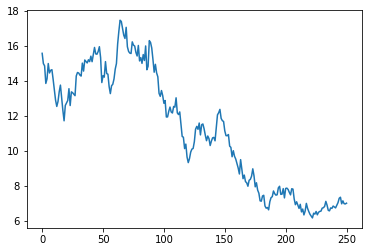

In [ ]:
price_series = [stock['Adj Close'][-1]]
for i in daily_return_percentages:
  price_series.append(price_series[-1] * i)
plt.plot(price_series)
plt.show(price_series)

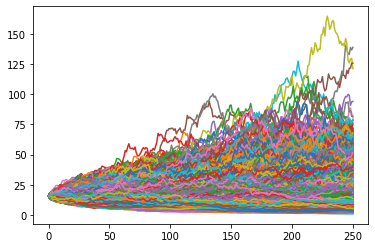

In [ ]:
number_of_trials = 10000

closing_prices = [] 

for i in range(number_of_trials):
  daily_return_percentages = np.random.normal(cagr/number_of_trading_days,std_dev/math.sqrt(number_of_trading_days), number_of_trading_days) + 1
  price_series = [stock['Adj Close'][-1]]


  for j in daily_return_percentages:
    price_series.append(price_series[-1] * j)


  closing_prices.append(price_series[-1])

  plt.plot(price_series)

plt.show()


(array([2.500e+02, 1.218e+03, 1.689e+03, 1.661e+03, 1.285e+03, 1.005e+03,
        7.080e+02, 5.280e+02, 4.080e+02, 2.940e+02, 2.080e+02, 1.670e+02,
        1.220e+02, 1.160e+02, 6.100e+01, 5.200e+01, 4.800e+01, 3.100e+01,
        3.600e+01, 3.100e+01, 1.800e+01, 1.200e+01, 8.000e+00, 9.000e+00,
        1.500e+01, 9.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  0.73856926,   3.50464138,   6.27071349,   9.03678561,
         11.80285773,  14.56892984,  17.33500196,  20.10107407,
         22.86714619,  25.6332183 ,  28.39929042,  31.16536253,
         33.93143465,  36.69750676,  39.46357888,  42.229651  ,
         44.99572311,  47.76179523,  50.52786734,  53.29393946,
         56.06001157,  58.82608369,  61.5921558 ,  64.35

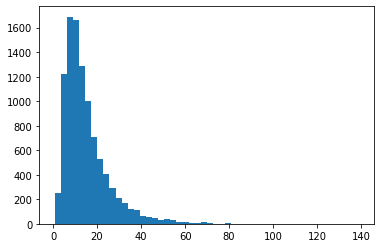

In [ ]:
plt.hist(closing_prices,bins=50)

27.915557009916274
5.443646699339465
12.19


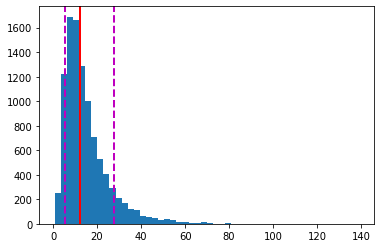

In [ ]:
top_ten = np.percentile(closing_prices, 90)
bottom_ten = np.percentile(closing_prices,10)
median_ending_price = round(np.median(closing_prices),2)

plt.hist(closing_prices, bins = 50)

plt.axvline(top_ten, color = 'm', linestyle = 'dashed', linewidth = '2')
plt.axvline(bottom_ten, color = 'm', linestyle = 'dashed', linewidth = '2')
plt.axvline(median_ending_price, color = 'r', linestyle = 'solid', linewidth = '2')

print(top_ten)
print(bottom_ten)
print(median_ending_price)